<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import pandas as pd

In [261]:
data = pd.read_csv('Dataset-with-sentiments_f.csv')

In [262]:
sum(data['stop_comments'].isnull())

8

In [263]:
data = data[data['stop_comments'].notnull()]

In [264]:
sum(data['stop_comments'].isnull())

0

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [267]:
X_train.shape

(6507,)

In [268]:
X_test.shape

(1627,)

In [269]:
data['pol_cat'].value_counts()

0    4900
1    3234
Name: pol_cat, dtype: int64

## **Gonna Apply SVM**

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [271]:
tf_train

<6507x6746 sparse matrix of type '<class 'numpy.float64'>'
	with 44161 stored elements in Compressed Sparse Row format>

In [272]:
tf_train.toarray()[0].sum()

3.8864748009710217

In [273]:
tf_train.shape

(6507, 6746)

**Print the Vocabulary**

In [274]:
#vocab = vect.vocabulary_

In [275]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [276]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(tf_train, y_train)

SVC(kernel='linear')

**Accuracy score on training dataset**

In [277]:
prediction_linear = classifier_linear.predict(tf_test)
# results
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       975
           1       0.90      0.83      0.86       652

    accuracy                           0.89      1627
   macro avg       0.90      0.88      0.89      1627
weighted avg       0.90      0.89      0.89      1627



**plot confusion matrix for the test dataset**

In [280]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [281]:
pip install mlxtend

[[542 110]
 [ 61 914]]


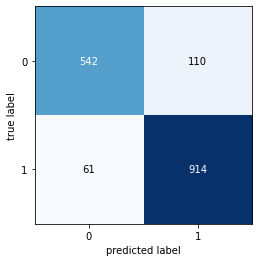

In [282]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

# **Test the model with the comments of the other video**

In [285]:
data_test = pd.read_csv('Video_2/Dataset-with-sentiments.csv')

In [286]:
sum(data_test['stop_comments'].isnull())

1

In [287]:
data_test = data_test[data_test['stop_comments'].notnull()]

In [288]:
sum(data_test['stop_comments'].isnull())

0

In [289]:
data_test['pol_cat'].value_counts()

1    832
0    673
Name: pol_cat, dtype: int64

In [290]:
tf_test = vect.transform(data_test['stop_comments'])

In [291]:
tf_test

<1505x6746 sparse matrix of type '<class 'numpy.float64'>'
	with 12934 stored elements in Compressed Sparse Row format>

In [292]:
tf_test.toarray()[0].sum()

1.0

In [293]:
tf_train.toarray().shape

(6507, 6746)

In [294]:
tf_test.toarray().shape

(1505, 6746)

In [295]:
predicted = classifier_linear.predict(tf_test)

In [296]:
expected = data_test['pol_cat']

[[697 135]
 [ 49 624]]


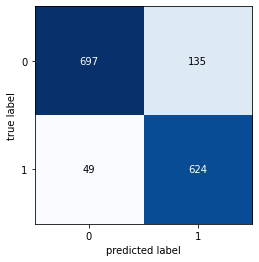

In [297]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [298]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       673
           1       0.93      0.84      0.88       832

    accuracy                           0.88      1505
   macro avg       0.88      0.88      0.88      1505
weighted avg       0.88      0.88      0.88      1505



# **Now we are going to study the impact of the video**

In [309]:
predicted[predicted==0] = -1

In [310]:
predicted

array([-1, -1,  1, ..., -1, -1,  1])

In [311]:
likes = np.array(list(data_test['Likes']))
likes

array([1, 0, 3, ..., 0, 0, 3])

In [304]:
num_comentarios_pos = sum(predicted[predicted==1])
num_comentarios_pos

746

In [313]:
num_likes_positivos = sum(likes[predicted==1])
num_likes_positivos

358451

In [314]:
impacto = (num_comentarios_pos + num_likes_positivos)/(len(predicted) + sum(likes))
impacto

0.5330795544771191

In [318]:
vistas = 3121775747
likes_video = 13626143
dislikes_video = 397679

In [317]:
popularidad = likes_video/(likes_video + dislikes_video)
popularidad

0.9716426092687144

In [324]:
skore = 2 / (1/impacto + 1/popularidad)
skore

0.6884497640023362

In [322]:
relevancia = (dislikes_video)/(len(predicted) + sum(likes))
relevancia

0.5901901857334728